### Surport Vector Machines
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

(3, 2)


e:\applist\miniconda\envs\spider\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:191: UserWarning: The following kwargs were not used by contour: 'linestyle'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


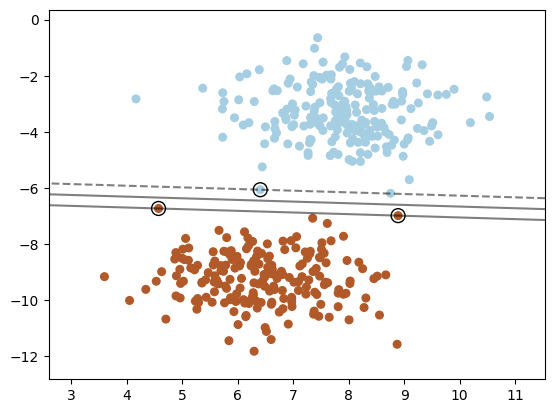

In [2]:
from sklearn import svm 
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# example1
X, Y = make_blobs(n_samples=400, centers=2, random_state=6)

clf = svm.SVC(kernel='linear',C= 1000)
clf.fit(X, Y)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method = 'contour',
    colors = 'k',
    levels = [-1, 0, 1],
    ax = ax,
    alpha = 0.5,
    linestyle = ["--", "-", "--"]
    
)
print(clf.support_vectors_.shape)
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)


e:\applist\miniconda\envs\spider\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:191: UserWarning: The following kwargs were not used by contour: 'linestyle'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
e:\applist\miniconda\envs\spider\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:191: UserWarning: The following kwargs were not used by contour: 'linestyle'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


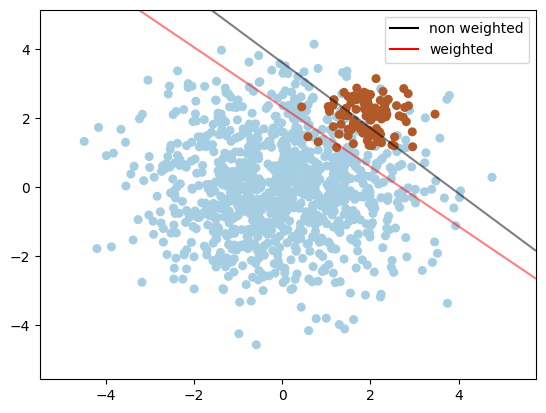

In [3]:
## example2
import matplotlib.lines as mlines
nsample_1 = 1000
nsample_2 = 100
center = [[0, 0], [2, 2]]
cluster_std = [1.5, 0.5]

X, Y = make_blobs(n_samples=[nsample_1, nsample_2], centers=center, cluster_std=cluster_std, random_state=0, shuffle=False)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)

clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, Y)


wclf = svm.SVC(kernel='linear',class_weight={1: 15})
wclf.fit(X, Y)

ax = plt.gca()

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method = 'contour',
    colors = 'k',
    levels = [0],
    ax = ax,
    alpha = 0.5,
    linestyle = ["-"]
)

wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method = 'contour',
    colors = 'r',
    levels = [0],
    ax = ax,
    alpha = 0.5,
    linestyle = ["-"]
)

plt.legend(
    [
        mlines.Line2D([], [], color='k', label= "non weighted"),
        mlines.Line2D([], [], color='r', label= "weighted"),
    ],
    ['non weighted', 'weighted'],
    loc="upper right"
)
plt.show()

## Nearest Neighbors
- it is often successful in classification situations where the decision boundary is very irregular.
- Calculate the distance between the samples and select the nearest K samples, and finally decide the type by voting

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


e:\applist\miniconda\envs\spider\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:191: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)
e:\applist\miniconda\envs\spider\Lib\site-packages\sklearn\inspection\_plot\decision_boundary.py:191: UserWarning: The following kwargs were not used by contour: 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


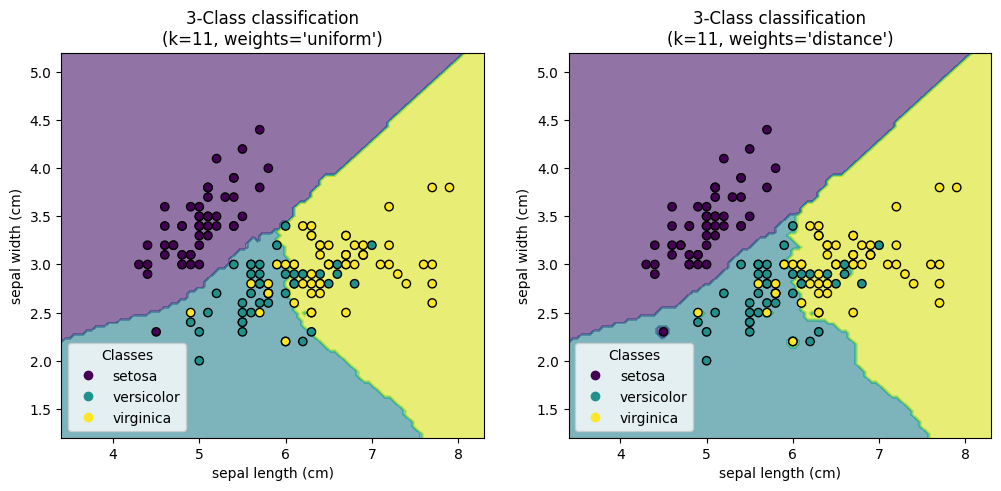

In [4]:
# knn nearest neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



iris = load_iris(as_frame=True)
print(iris.data.head())
X = iris.data[['sepal length (cm)', 'sepal width (cm)']]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
    
)

_, axs = plt.subplots(ncols = 2, figsize=(12, 5))

for ax, weights in zip(axs, ('uniform', 'distance')):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="contourf",
        xlabel = iris.feature_names[0],
        ylabel = iris.feature_names[1],
        shading='auto',
        alpha=0.6,
        ax=ax
    )
    
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc = "lower left",
        title = "Classes"
    )
    
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print("indices",indices)
print("distance",distances)